---
# Lambda School Data Science - Intro to Statistics
---
# 02 - Descriptive Statistics I
---



##STOP! BEFORE GOING ANY FURTHER...  


1. Click "File" at the top.
2. Then, "Save a Copy in Drive."
3. Change the file name to "FIRSTNAME_LASTNAME_1_2"  

Now you have a copy of this notebook in your Drive account. This is the copy you'll edit and submit. Be sure to do this for ***every*** assignment!


### Import Numpy, pandas, and matplotlib

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the data in the CSV file
Today you'll be working with the tips dataset from the lecture. You can find the data [here](https://raw.githubusercontent.com/axrd/datasets/master/tipdata.csv). Be careful not to import an extra index column! See the lecture notebook for a workaround.

In [0]:
Dir = "https://raw.githubusercontent.com/axrd/datasets/master/tipdata.csv"
Data = pd.read_csv(Dir)
Data.drop(Data.columns[0], axis = 1, inplace = True) # Drop spare index column.

### Print out the first 10 rows

In [146]:
Data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### Print out the last 10 rows

In [147]:
Data.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### What is the shape of the DataFrame?

In [148]:
Ds = Data.shape
print("%d rows, %d columns." % Ds)

244 rows, 7 columns.


### What is the data type of each column/feature?

In [149]:
Data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

### Are there any missing values?

In [150]:
print("Rows with missing values:\n------------------------")
for Column in Data.columns:
  Dnan = Data[Data[Column].isnull()] # Get cells with NaNs in column.
  Rows = Dnan.index.tolist()
  if (len(Rows) > 0):
    print("* In %8s column:" % Column)
    print(Rows)
print("........................ None!")

Rows with missing values:
------------------------
........................ None!


### What is the average total bill? Calculate the mean, median, and mode. 

In [151]:
M1 = float(Data["total_bill"].mean())
M2 = float(Data["total_bill"].median())
M3 = float(Data["total_bill"].mode())

print("Total bill amounts' mean:    M1 = %0.2f" % M1)
print("Total bill amounts' median:  M2 = %0.2f" % M2)
print("Total bill amounts' mode:    M3 = %0.2f" % M3)

Total bill amounts' mean:    M1 = 19.79
Total bill amounts' median:  M2 = 17.80
Total bill amounts' mode:    M3 = 13.42


### Which of the three do you think best represents the data? Why?


---



The mode would be very inaccurate for representing central tendency in the representation of a continuous variable like this. As seen below, the median is calculated over "mid-values" and the inferred distribution is quite stacked on the left, so may also be inaccurate. I think that the mean might be a better indicator as there don't seem to be any relevant outliers.



### Visualize the distribution of tips. Describe it (skew, kurtosis, etc.).

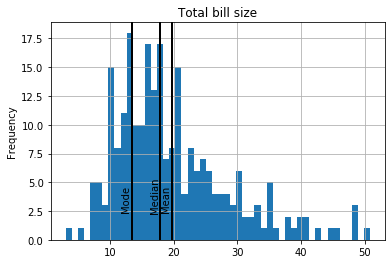

Kurtosis: 1.22


In [152]:
Data["total_bill"].plot(kind = "hist", title = "Total bill size", bins = 50)
plt.text(M1, 2.5, "Mean  ", rotation = 'vertical', ha = 'right')
plt.text(M2, 2.5, "Median", rotation = 'vertical', ha = 'right')
plt.text(M3, 2.5, "Mode  ", rotation = 'vertical', ha = 'right')
plt.axvline(M1, color = 'k', linewidth = 2)
plt.axvline(M2, color = 'k', linewidth = 2)
plt.axvline(M3, color = 'k', linewidth = 2)
plt.grid(True)
plt.show()

print("Kurtosis: %0.2f" % Data["total_bill"].kurtosis())

The skew is notably positive, due to the mode-median-mean location and the data accumulation on the left. The distribution seems to be leptokurtic, due to the height of the central values in relation to the tail, and because of having a positive value (1.22)

### What is the range of tips? 

In [153]:
print("The tip amounts range from %0.2f up to %0.2f." \
      % (Data["tip"].min(), Data["tip"].max()))

The tip amounts range from 1.00 up to 10.00.


### Create a boxplot for tips. See module 6 of the Intro to Pandas lesson for hints. 

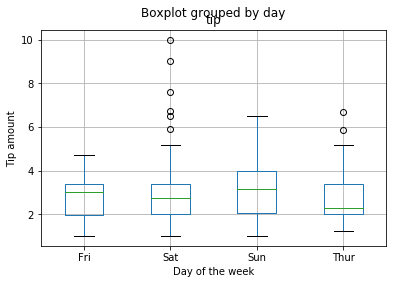

Seems as if some people are very generous on Saturdays!


In [154]:
Data.boxplot(column = 'tip', by = 'day')
plt.grid(True)
plt.xlabel("Day of the week")
plt.ylabel("Tip amount")
plt.show()
print("Seems as if some people are very generous on Saturdays!")

### What was the most common day?

In [155]:
import statistics as stats
print("The most common day has been %s" \
      % stats.mode(Data["day"]))

The most common day has been Sat


### What was the most common gender?

In [156]:
print("The most common gender has been %s" \
      % stats.mode(Data["sex"]))

The most common gender has been Male


### What is the standard deviation of "tips"?

In [157]:
print("The standard deviation of the tip amounts is %0.2f." \
      % Data["tip"].std())

The standard deviation of the tip amounts is 1.38.


### What is the variance of total bill?

In [158]:
print("The variance of the bill amounts is %0.2f." \
      % Data["total_bill"].var())

The variance of the bill amounts is 79.25.


### Submit your assignment notebook! (Make sure you've changed the name to FIRSTNAME_LASTNAME_1_2): 

1.  Click the Share button in the upper-right hand corner of the notebook.
2.  Get the shareable link.
3.  Set condition to: "Anyone with the link can comment."
4.  TBD 


---

The question below is _optional_. Only tackle it after you've completed the rest of the assignment!

### STRETCH: Visualize all the numeric features and describe their distributions.